In [6]:
from __future__ import division
 
import numpy as np
 
def cmdscale(D,q):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w[0:q]]))
    V  = evecs[:,w[0:q]]
    Y  = V.dot(L)
 
    return Y, evals


In [7]:
#import data
import pandas as pd

In [8]:
data = pd.read_csv('airline_distance.csv', header = None)

In [9]:
Y, evals = cmdscale(data,2)

In [42]:
evals

array([  9.58214430e+06,   1.68682018e+06,   8.15729844e+03,
         1.43286990e+03,   5.08668686e+02,   2.51434858e+01,
        -2.87022927e-10,  -8.97701286e+02,  -5.46757672e+03,
        -3.54788852e+04])

In [44]:
Y

array([[ -718.75938065,   142.99426901],
       [ -382.0557659 ,  -340.83962288],
       [  481.60233633,   -25.28504058],
       [ -161.46625837,   572.76991083],
       [ 1203.73802481,   390.10029052],
       [-1133.52707667,   581.90730913],
       [-1072.23568624,  -519.02423018],
       [ 1420.60331937,   112.58920212],
       [ 1341.72247895,  -579.73927843],
       [ -979.62199162,  -335.47280955]])

In [12]:
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
name = ['Atlanta', 'Chicago', 'Denver', 'Houston', 'LosAngeles', 'Miami', 'NewYork', 'SanFrancisco', 'Seattle',
        'WashingtonDC']

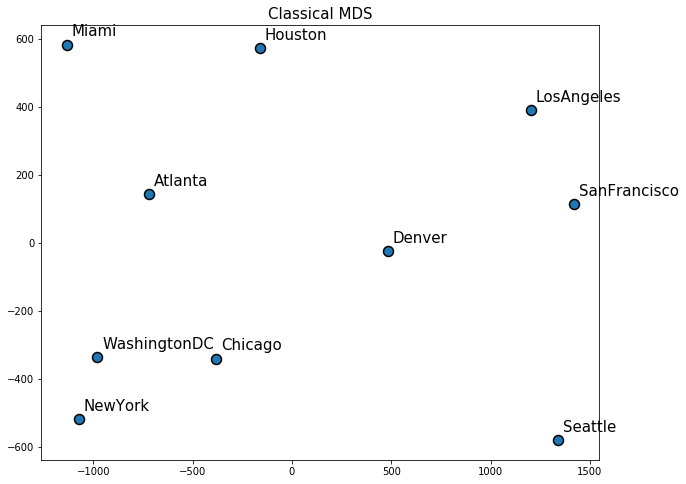

In [47]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(Y[:, 0], Y[:, 1],  s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title("Classical MDS",size = 15)
for i in range(10):
    plt.annotate(name[i], xy=(Y[i]), xytext=((Y[i]+25)), size = 15)

In [15]:
from sklearn import manifold

In [26]:
MDS = manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')
result = MDS.fit(data, y=None, init=None)
nMDS = manifold.MDS(n_components=2, metric=False, dissimilarity='precomputed')
result_n = nMDS.fit(data, y=None, init=None)

In [27]:
nMDS_result = nMDS.fit_transform(data, y=None, init=None)

In [28]:
MDS_result = MDS.fit_transform(data, y=None, init=None)

In [29]:
MDS_result

array([[  207.80213345,  -703.31208366],
       [ -290.49897242,  -421.94300444],
       [  -75.90314235,   470.90903109],
       [  541.29614561,  -111.53030772],
       [ -453.58010722,  1157.64752193],
       [  676.5325087 , -1076.72663403],
       [ -388.68609848, -1131.09872007],
       [ -287.87777532,  1397.72467501],
       [  294.69152045,  1433.97903068],
       [ -223.77621241, -1015.6495088 ]])

In [30]:
nMDS_result

array([[ 0.09327621,  0.35847044],
       [-0.08122622,  0.21834921],
       [-0.08480386, -0.1920612 ],
       [ 0.29264616,  0.03277128],
       [ 0.12856469, -0.59097476],
       [ 0.26626766,  0.43128606],
       [-0.25445082,  0.4427453 ],
       [ 0.08114321, -0.55489063],
       [-0.26716357, -0.60961001],
       [-0.1990482 ,  0.48754951]])

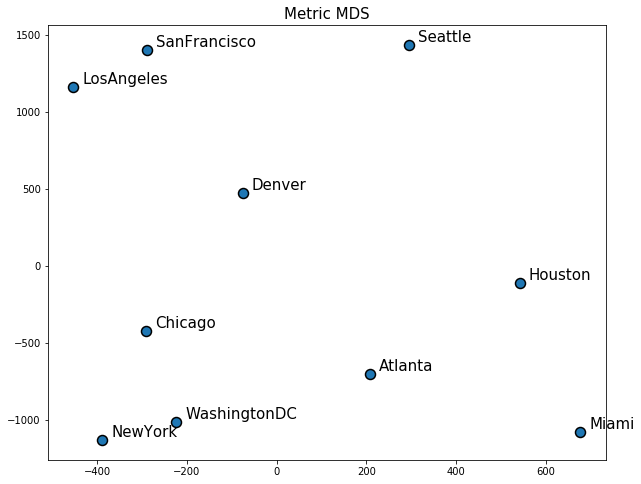

In [49]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(MDS_result[:, 0], MDS_result[:, 1],  s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title("Metric MDS", size = 15)
for i in range(10):
    plt.annotate(name[i], xy=(MDS_result[i]), xytext=((MDS_result[i]+20)),size = 15)

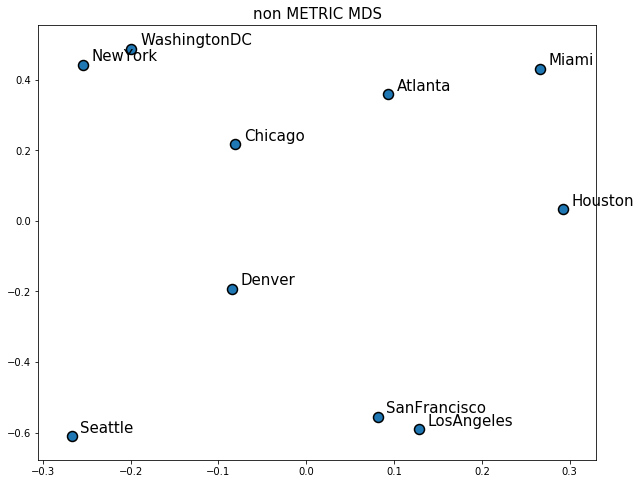

In [52]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(nMDS_result[:, 0], nMDS_result[:, 1],  s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.title("non METRIC MDS", size = 15)
for i in range(10):
    plt.annotate(name[i], xy=(nMDS_result[i]), xytext=((nMDS_result[i]+.01)),size = 15)

In [62]:
import math
matrix = np.asarray([(0,math.pi/2,math.pi,math.pi/4, math.pi/2, 0, math.pi/2, 3*math.pi/4, math.pi, math.pi/2, 0, 3*math.pi/4,
          math.pi/4, 3*math.pi/4, 3*math.pi/4, 0)]).reshape(4,4)

In [63]:
matrix

array([[ 0.        ,  1.57079633,  3.14159265,  0.78539816],
       [ 1.57079633,  0.        ,  1.57079633,  2.35619449],
       [ 3.14159265,  1.57079633,  0.        ,  2.35619449],
       [ 0.78539816,  2.35619449,  2.35619449,  0.        ]])

In [124]:
Y, evals = cmdscale(matrix,2)
NAME = ['a', 'd', 'b', 'c']

In [125]:
Y = np.append(Y,Y[0])

In [126]:
Y = Y.reshape(5,2)

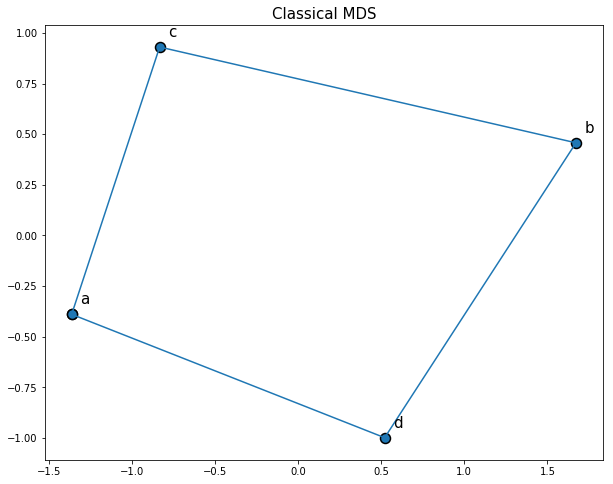

In [127]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(Y[:, 0], Y[:, 1],  s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(Y[:, 0], Y[:, 1])
plt.title("Classical MDS",size = 15)
for i in range(4):
    plt.annotate(NAME[i], xy=(Y[i]), xytext=((Y[i]+.05)), size = 15)

In [118]:
a = np.zeros((4,4),dtype=float)

In [119]:
for i in range(4):
    for j in range(4):
        a[i,j] = np.dot(Y[i],Y[i].T) + np.dot(Y[j],Y[j].T) - 2*np.dot(Y[i],Y[j].T)

In [120]:
a

array([[ 0.        ,  0.94434314,  3.54311028,  0.13147861],
       [ 0.94434314,  0.        ,  0.82908664,  0.37109223],
       [ 3.54311028,  0.82908664,  0.        ,  2.30953474],
       [ 0.13147861,  0.37109223,  2.30953474,  0.        ]])